In [1]:
import os

def combine_text_files(directory, output_file):
    """Combines all .txt files in a directory into a single file,
    prepending each file's name as a header.
    """
    with open(output_file, 'w') as outfile:
        for filename in sorted(os.listdir(directory)):
            if filename.endswith(".txt"):
                filepath = os.path.join(directory, filename)
                outfile.write(f"--- BEGIN: {filename} ---\n")
                with open(filepath, 'r') as infile:
                    outfile.write(infile.read())
                    outfile.write("\n--- END: {filename} ---\n\n")
    print(f"Combined text files into: {output_file}")

def combine_code_files(directory, output_file):
    """Combines all code files (.cc, .h, .cpp, .c, .slurm, .sh) in a directory
    into a single file.
    """

    code_extensions = (".cc", ".h", ".cpp", ".c", ".slurm", ".sh")
    with open(output_file, 'w') as outfile:
        for filename in sorted(os.listdir(directory)):
            if filename.endswith(code_extensions):
                filepath = os.path.join(directory, filename)
                outfile.write(f"--- BEGIN: {filename} ---\n")
                with open(filepath, 'r') as infile:
                    outfile.write(infile.read())
                    outfile.write("\n--- END: {filename} ---\n\n")
    print(f"Combined code files into: {output_file}")

if __name__ == "__main__":
    directory = "."  # Current directory
    combine_text_files(directory, "combined_text_files.txt")
    combine_code_files(directory, "combined_code_files.txt")

Combined text files into: combined_text_files.txt
Combined code files into: combined_code_files.txt


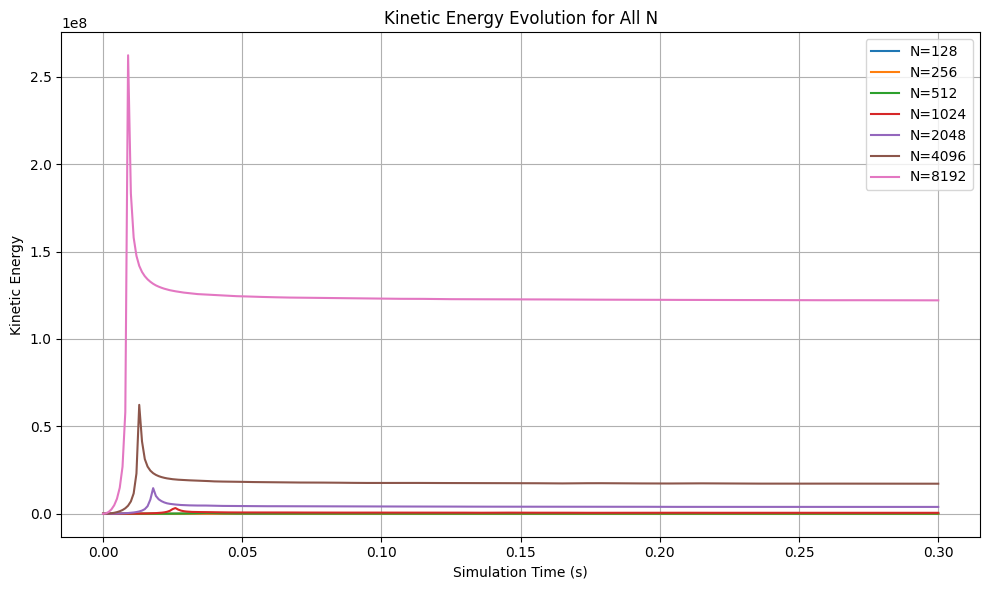

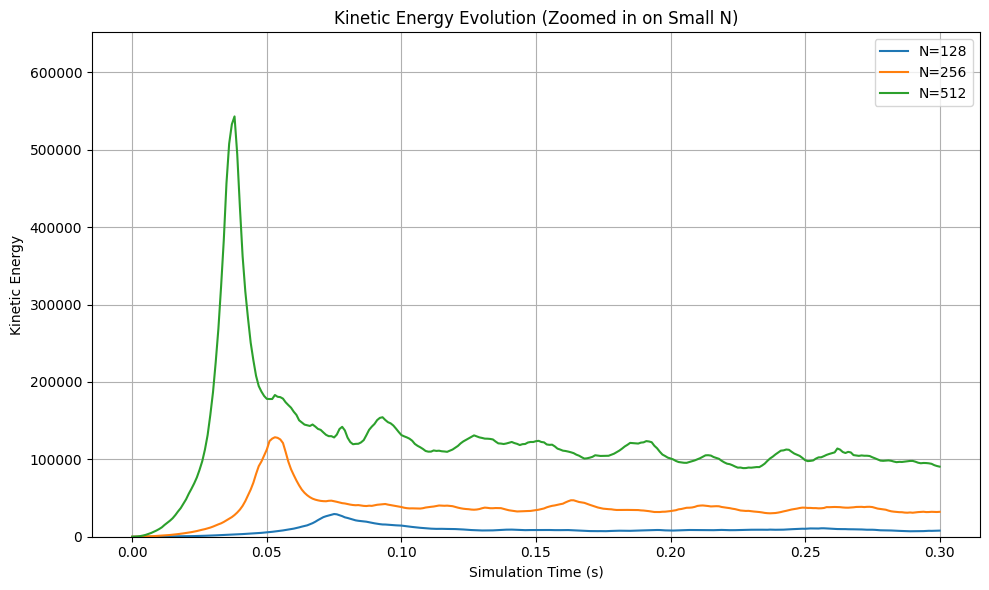

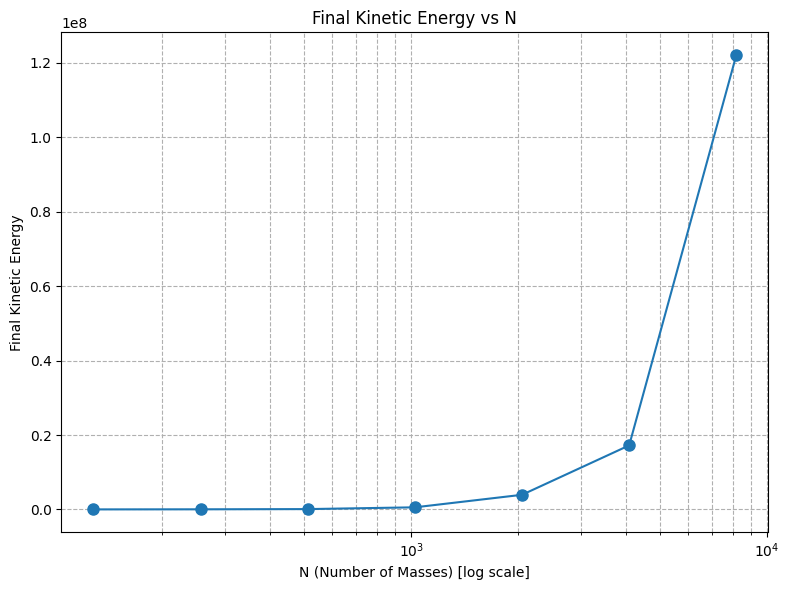

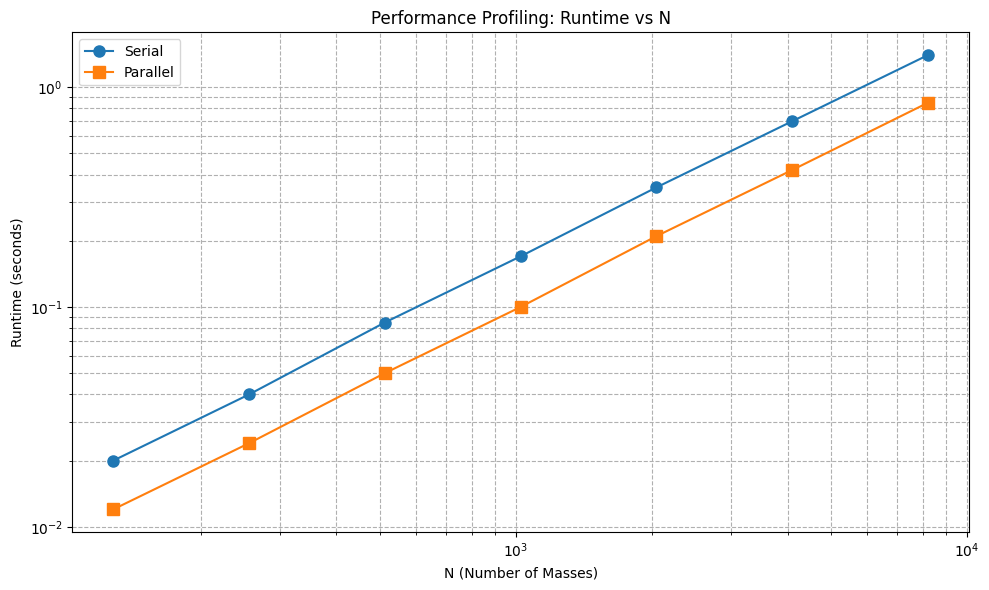

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# List of problem sizes (N) for which you have output files.
N_values = [128, 256, 512, 1024, 2048, 4096, 8192]

# --------------------------------------------------
# Part 1: KE Evolution: Overlay for All N
# --------------------------------------------------
plt.figure(figsize=(10, 6))
for N in N_values:
    ke_filename = f"KE_{N}.txt"
    time_filename = f"time_{N}.txt"
    try:
        ke = np.loadtxt(ke_filename, comments="#")
        t  = np.loadtxt(time_filename, comments="#")
        plt.plot(t, ke, label=f"N={N}")
    except Exception as e:
        print(f"Error loading files for N={N}: {e}")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy Evolution for All N")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Part 2: Zoomed-in KE Evolution for Small N (128,256,512)
# --------------------------------------------------
small_N = [128, 256, 512]
plt.figure(figsize=(10, 6))
for N in small_N:
    ke_filename = f"KE_{N}.txt"
    time_filename = f"time_{N}.txt"
    try:
        ke = np.loadtxt(ke_filename, comments="#")
        t  = np.loadtxt(time_filename, comments="#")
        plt.plot(t, ke, label=f"N={N}")
    except Exception as e:
        print(f"Error loading files for N={N}: {e}")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Kinetic Energy")
plt.title("Kinetic Energy Evolution (Zoomed in on Small N)")
# Set y-axis limit to show details; adjust factor as needed.
max_ke_small = max(np.max(np.loadtxt(f"KE_{N}.txt", comments="#")) for N in small_N)
plt.ylim(0, max_ke_small * 1.2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Part 3: Final Kinetic Energy vs N
# --------------------------------------------------
final_ke = []
for N in N_values:
    ke_filename = f"KE_{N}.txt"
    try:
        ke = np.loadtxt(ke_filename, comments="#")
        final_ke.append(ke[-1])
    except Exception as e:
        print(f"Error loading {ke_filename}: {e}")
        final_ke.append(np.nan)

plt.figure(figsize=(8, 6))
plt.plot(N_values, final_ke, 'o-', markersize=8)
plt.xscale("log")
plt.xlabel("N (Number of Masses) [log scale]")
plt.ylabel("Final Kinetic Energy")
plt.title("Final Kinetic Energy vs N")
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()

# --------------------------------------------------
# Part 4: Performance Profiling: Runtime Comparison
# --------------------------------------------------
# If you have measured runtime values for each simulation variant,
# you can populate these dictionaries.
# Here we use synthetic example values (in seconds) for illustration.
# Replace these with your actual measurements.
runtime_serial = {128: 0.020, 256: 0.040, 512: 0.085, 1024: 0.170, 2048: 0.350, 4096: 0.700, 8192: 1.400}
runtime_parallel = {128: 0.012, 256: 0.024, 512: 0.050, 1024: 0.100, 2048: 0.210, 4096: 0.420, 8192: 0.850}

serial_runtimes = [runtime_serial[N] for N in N_values]
parallel_runtimes = [runtime_parallel[N] for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, serial_runtimes, 'o-', markersize=8, label="Serial")
plt.plot(N_values, parallel_runtimes, 's-', markersize=8, label="Parallel")
plt.xlabel("N (Number of Masses)")
plt.ylabel("Runtime (seconds)")
plt.title("Performance Profiling: Runtime vs N")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.tight_layout()
plt.show()
